First build rectangular distribution.

In [1]:
# import the module build in a different folder
from scattering_structure.scattering_structure import ScatteringStructure

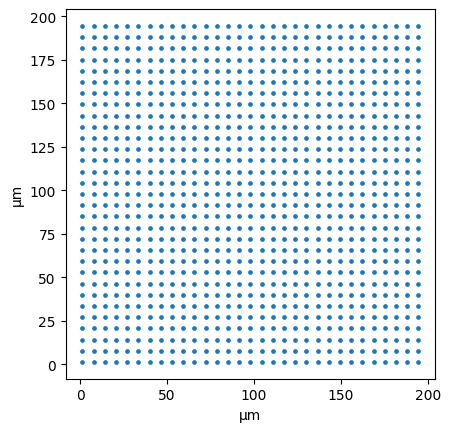

Density =  0.1361335890145112 /um^2


In [5]:
rect = ScatteringStructure(geometry={'type': 'box', 'lx': 200, 'ly': 200},
                           arrangement={'type':'rectangular', 'dist': 6.44},
                           scatterer_radius=1.343
                           )
rect.plot_distribution()
rect_rms = rect.rms()
rect_density = rect.density()

# print for further use
print('Density = ', rect_density, '/um^2')

Then build a poisson disc distribution on top of that. Which mimiks the same density
#### Note:
The geometry is now given as circle i.e., the distribution will automatically be reduced to a circle inside the class.

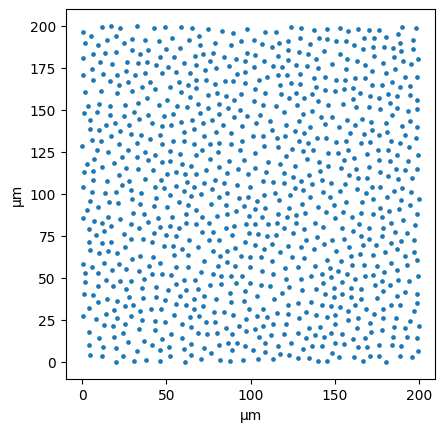

Mean of RMS(dist) =  0.1328754490068798 /um^2


In [6]:
pois = ScatteringStructure(geometry={'type': 'circle', 'lx': 200, 'ly': 200,
                                     'circle_radius': 90},
                           arrangement={'type':'poisson_disc', 'optimization': True,
                                        'measure_of_merit':'density',
                                        'target_mom': rect_density,
                                        'optimization_outer_n': 4,
                                        'optimization_inner_n': 8},
                           scatterer_radius=1.343
                           )
pois.plot_distribution()
pois_density = pois.density()

# print for further use
print('Mean of RMS(dist) = ', pois_density, '/um^2')

Now plot the distribution after it's been reduced to the desired geometry.
#### Note:
The points have also been shifted to lie around the origin. Making later exporting to Lumerical or gds easier.

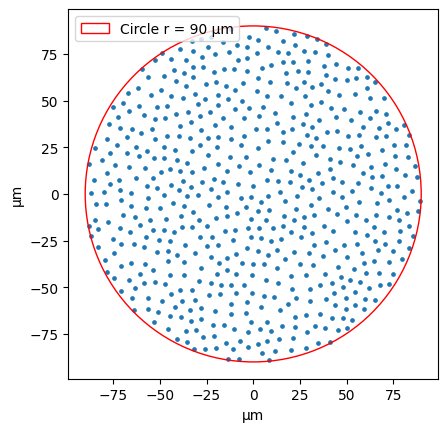

In [7]:
pois.plot_device()

Save the distribution to a file

In [8]:
pois.save_device(filepath='saves/first_device.txt')

Distribution saved to saves/first_device.txt


### Load first device and it's distribution

In [9]:
load_pois =  ScatteringStructure(geometry={'type': 'load_from_file'},
                                 arrangement={'type': 'load_from_file', 
                                              'filepath': 'saves/first_device.txt'},
                                 scatterer_radius=1.343
                           )

Distribution loaded from saves/first_device.txt


Let's try plotting the distribution again

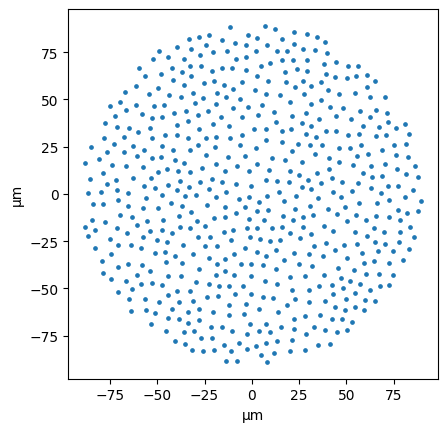

In [10]:
load_pois.plot_distribution()